# 1. Thêm thư viện


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

**Đọc dữ liệu**

In [4]:
data = pd.read_csv("accepted_2007_to_2018Q4.csv/accepted_2007_to_2018Q4.csv",low_memory=False)

Xem thông tin cơ bản:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


Có 2260701 dòng và 151 cột. Kích thước của tập dữ liệu 2.5+ GB.

Xem qua 5 dòng được chọn ngẫu nhiên. Mỗi dòng tương ứng với một khoản vay.

In [6]:
data.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2085404,123885197,NaN,20000.0,20000.0,20000.0,36 months,15.05,693.80,C,C4,manager partner,10+ years,RENT,109000.0,Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=123885197,NaN,other,Other,100xx,NY,20.69,0.0,Apr-2013,690.0,694.0,1.0,NaN,NaN,7.0,0.0,18708.0,60.3,7.0,w,12205.21,12205.21,11067.360000,11067.36,7794.79,3272.57,0.0,0.0,0.0,Mar-2019,693.80,Apr-2019,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,46113.0,0.0,2.0,0.0,1.0,17.0,14541.0,46.0,0.0,1.0,10738.0,61.0,31000.0,1.0,0.0,1.0,2.0,6588.0,12292.0,60.3,0.0,0.0,29.0,49.0,17.0,17.0,0.0,17.0,NaN,5.0,NaN,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,75664.0,46113.0,31000.0,31800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1165769,31326908,NaN,21175.0,21175.0,21175.0,60 months,18.24,540.48,D,D5,Manager,< 1 year,RENT,75000.0,Source Verified,Oct-2014,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=31326908,NaN,credit_card,Credit card refinancing,257xx,WV,35.10,0.0,Nov-1997,695.0,699.0,0.0,NaN,NaN,19.0,0.0,60197.0,91.9,45.0,w,0.00,0.00,7576.080000,7576.08,3382.25,4193.83,0.0,0.0,0.0,Dec-2015,540.48,NaN,Feb-2017,579.0,575.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,314864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65500.0,NaN,NaN,NaN,1.0,16572.0,1573.0,96.1,0.0,0.0,145.0,203.0,25.0,10.0,6.0,82.0,NaN,NaN,NaN,0.0,8.0,12.0,8.0,16.0,10.0,15.0,28.0,12.0,19.0,0.0,0.0,0.0,1.0,100.0,87.5,0.0,0.0,338208.0,94

## 2. Response Variable
<a id="3"></a>

In [7]:
data['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: count, dtype: int64

 Cố gắng tìm những khác biệt trong các đặc điểm giữa các khoản vay đã hoàn tất và đã bị thu hồi, không xem xét các khoản vay đang hiện hành, không đáp ứng chính sách tín dụng, đã mặc nợ hoặc có trạng thái thiếu thông tin. Vì vậy, chỉ giữ lại các khoản vay có trạng thái "Fully Paid" (Hoàn trả đủ) hoặc "Charged Off" (Bị thu hồi).

In [8]:
data = data.loc[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

Số khoản vay còn lại trong tập dữ liệu

In [9]:
data.shape

(1345310, 151)

In [10]:
data['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

Trạng thái được tính theo tỷ lệ phần trăm:

In [11]:
data['loan_status'].value_counts(normalize=True, dropna=False)

loan_status
Fully Paid     0.800374
Charged Off    0.199626
Name: proportion, dtype: float64

80% trong số khoản vay còn lại đã được trả đủ và 20% đã bị thu hồi, vì vậy chúng ta đang đối diện với một vấn đề phân loại hơi không cân bằng.

# 3. Giới hạn các thuộc tính

Bộ dữ liệu đầy đủ có 151 thuộc tính cho mỗi khoản vay. Lựa chọn các thuộc tính theo hai bước:

- Loại bỏ các thuộc tính mà có hơn 30% dữ liệu bị thiếu.
- Từ các thuộc tính còn lại, chỉ chọn những thuộc tính mà một nhà đầu tư có sẵn trước khi quyết định đầu tư vào khoản vay.

## 3.1 Loại bỏ các thuộc tính mà có hơn 30% dữ liệu bị thiếu.

Đầu tiên, tính phần trăm dữ liệu thiếu cho mỗi đặc điểm:

In [12]:
miss_fracs = data.isnull().mean().sort_values(ascending=False)

In [13]:
miss_fracs.head()

next_pymnt_d                                  1.000000
member_id                                     1.000000
orig_projected_additional_accrued_interest    0.997206
hardship_start_date                           0.995723
hardship_length                               0.995723
dtype: float64

Trực quan hóa phân phối phần trăm dữ liệu thiếu:

Text(0, 0.5, 'Số lượng thuộc tính')

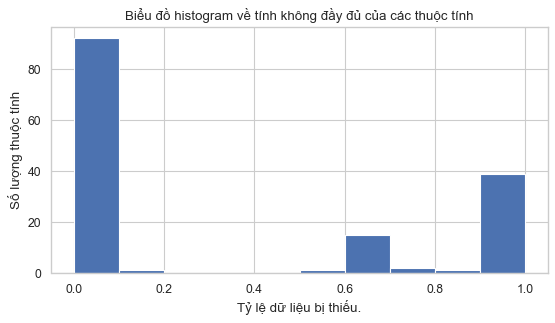

In [14]:
plt.figure(figsize=(8,4), dpi=80)
miss_fracs.plot.hist(bins=10)
plt.title('Biểu đồ histogram về tính không đầy đủ của các thuộc tính')
plt.xlabel('Tỷ lệ dữ liệu bị thiếu.')
plt.ylabel('Số lượng thuộc tính')

Từ biểu đồ histogram ở trên, thấy có một khoảng lớn giữa các đặc điểm thiếu ít dữ liệu (&lt;20%) và các đặc điểm thiếu nhiều dữ liệu (&gt;50%). Bởi vì thường rất khó để điền dữ liệu một cách chính xác khi có hơn 30% giá trị bị thiếu, sẽ loại bỏ các cột như vậy. Đầu tiên, lưu tất cả các biến có nhiều hơn 30% dữ liệu bị thiếu vào một danh sách theo thứ tự bảng chữ cái:

In [15]:
drop_lst = sorted(list(miss_fracs[miss_fracs > 0.3].index))
drop_lst

['all_util',
 'annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'se

In [16]:
len(drop_lst)

58

Loại bỏ các thuộc tính

In [17]:
data.drop(labels=drop_lst, axis=1, inplace=True)

In [18]:
data.shape

(1345310, 93)

## 3.2 Chỉ giữ lại các thuộc tính của khoản vay mà các nhà đầu tư tiềm năng biết đến.


Xem xét trang web của LendingClub và từ điển dữ liệu để xác định những đặc điểm nào sẽ có sẵn cho các nhà đầu tư tiềm năng. Dưới đây là danh sách các đặc điểm mà hiện có, được sắp xếp theo thứ tự bảng chữ cái:

In [19]:
print(sorted(data.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

Sau khi tìm hiểu thông tin trên mạng
1. **Thông Tin Cá Nhân và Nghề Nghiệp**: Các cột như `emp_title`, `emp_length`, `annual_inc`, và `home_ownership` cung cấp thông tin quan trọng về người vay, bao gồm tình trạng việc làm, thu nhập, và tình trạng sở hữu nhà.

2. **Thông Tin Tín Dụng và Tài Chính**: Các cột như `fico_range_high`, `fico_range_low`, `dti`, `open_acc`, `total_acc`, `revol_bal`, và `revol_util` phản ánh lịch sử tín dụng và tình hình tài chính của người vay.

3. **Thông Tin Khoản Vay**: `loan_amnt`, `term`, `int_rate`, `installment`, `grade`, `sub_grade`, và `loan_status` cung cấp thông tin cụ thể về khoản vay, bao gồm số tiền, điều kiện, lãi suất, và trạng thái hiện tại.

4. **Thông Tin Địa Lý**: `addr_state` và `zip_code` cho phép phân tích dựa trên vị trí địa lý, có thể hữu ích trong việc xác định xu hướng vay và trả nợ theo khu vực.

5. **Thông Tin Khác**: Các cột như `purpose`, `application_type`, `initial_list_status`, và `verification_status` cung cấp thông tin bổ sung có thể hữu ích trong việc hiểu rõ hơn về mục đích vay, loại hình ứng dụng, và quy trình xác minh.



In [20]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [21]:
len(keep_list)

31

Loại bỏ những cột không có trong keep_list

In [22]:
drop_list = [col for col in data.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc

In [23]:
len(drop_list)

62

In [24]:
data.drop(labels=drop_list, axis=1, inplace=True)

In [25]:
data.shape

(1345310, 31)

# 4. Chuẩn bị và phân tích dữ liệu

Kiểm tra từng thuộc tính một cách riêng lẻ và thực hiện các bước sau:

- Loại bỏ đặc trưng nếu nó không hữu ích cho việc dự đoán tình trạng của khoản vay.
- Xem xét thống kê tổng quát và trực quan hóa dữ liệu, vẽ biểu đồ so sánh với tình trạng khoản vay.
- Chỉnh sửa đặc trưng để làm cho nó hữu ích hơn cho việc mô hình hóa, nếu cần thiết.

In [26]:
def plot_variable(col_name, full_name, continuous):

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)

    # Plot without loan status
    if continuous:
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(x=col_name, data=data, order=sorted(data[col_name].dropna().unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = data.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)

    plt.tight_layout()


## 4.1 ID

In [27]:
data['id'].sample(10)

210198      55492833
29266       66402569
86855       63406463
208430      55161435
173298      58140443
115933      60719378
112092      61464245
2030798     84545485
631803     113178784
326101      44926202
Name: id, dtype: object

Kiểm tra ID có bị trùng hay không

In [28]:
data['id'].describe()

count      1345310
unique     1345310
top       68407277
freq             1
Name: id, dtype: object

In [29]:
data.drop('id', axis=1, inplace=True)

## 4.2 loan_amnt

In [30]:
data['loan_amnt'].describe()

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [31]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


Số tiền vay dao động từ 500 đô la đến 40.000 đô la, với số tiền trung bình là 12.000 đô

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\4280792411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)


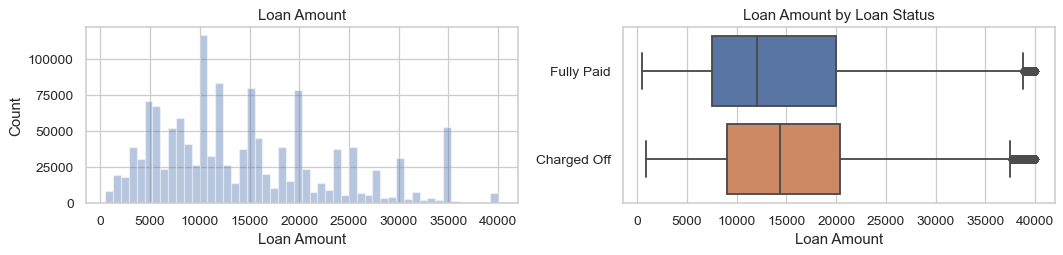

In [32]:
plot_variable('loan_amnt', 'Loan Amount',True)

Các khoản vay bị xác định là không thu hồi lại được thường có số tiền vay cao hơn. So sánh các thống kê tổng hợp theo tình trạng khoản vay:




In [33]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


## 4.3 term

In [34]:
data['term'].value_counts(dropna=False)

term
 36 months    1020743
 60 months     324567
Name: count, dtype: int64

Chuyển `term` sang int.

In [35]:
data['term'] = data['term'].apply(lambda x: np.int8(x.split()[0]) if isinstance(x, str) else x)

In [36]:
data['term'].value_counts(normalize=True)

term
36    0.758742
60    0.241258
Name: proportion, dtype: float64

So sánh tỷ lệ khoản vay không thu hồi theo kỳ hạn vay:




In [37]:

data.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.159934
60    0.324454
Name: proportion, dtype: float64

Khoảng 76% các khoản vay đã hoàn thành có kỳ hạn ba năm, và phần còn lại có kỳ hạn năm năm. Các khoản vay có kỳ hạn năm năm có khả năng không thu hồi cao hơn hơn hai lần so với các khoản vay có kỳ hạn ba năm.

## 4.4 int_rate

In [38]:
data['int_rate'].describe()

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

Lãi suất dao động từ 5,31% đến 3,09% (!) với mức trung bình là 1.27%.

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\4280792411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)


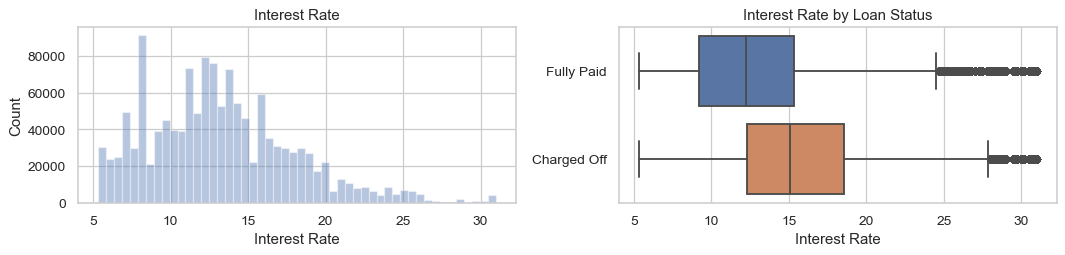

In [39]:
plot_variable('int_rate', 'Interest Rate',True)

Những khoản vay xấu thường có lãi suất cao hơn đáng kể.

So sánh các thống kê tóm tắt theo tình trạng khoản vay.

In [40]:
data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15.710714,4.910387,5.31,12.29,15.05,18.55,30.99
Fully Paid,1076751.0,12.623288,4.527227,5.31,9.17,12.23,15.31,30.99


## 4.5 installment

In [41]:
data['installment'].describe()

count    1.345310e+06
mean     4.380755e+02
std      2.615126e+02
min      4.930000e+00
25%      2.484800e+02
50%      3.754300e+02
75%      5.807300e+02
max      1.719830e+03
Name: installment, dtype: float64

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\4280792411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)


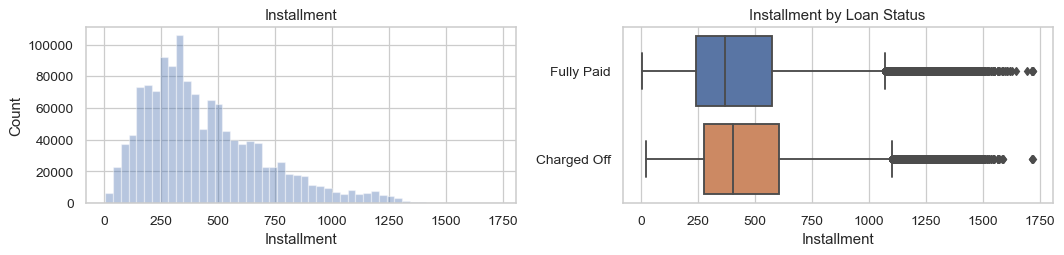

In [42]:
plot_variable('installment', 'Installment', True)

Các khoản vay được tính phí có xu hướng trả góp cao hơn. So sánh số liệu thống kê tóm tắt theo tình trạng khoản vay:

In [43]:
data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,465.147994,262.774106,21.62,275.29,402.83,605.31,1717.63
Fully Paid,1076751.0,431.323226,260.759563,4.93,240.92,368.26,573.06,1719.83


## 4.6 grade, sub_grade

Định nghĩa cho grade: "LendingClub chỉ định cấp độ cho vay."

Định nghĩa cho sub_grade: "LendingClub chỉ định cấp độ cho vay dưới cấp grade."

Các giá trị có thể có của grade và sub_grade là gì?

In [44]:
print(sorted(data['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [45]:
print(sorted(data['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


Cột grade có thể được suy ra từ cột subgrade, vì vậy bỏ đi cột grade.

In [46]:
data.drop('grade', axis=1, inplace=True)

In [47]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

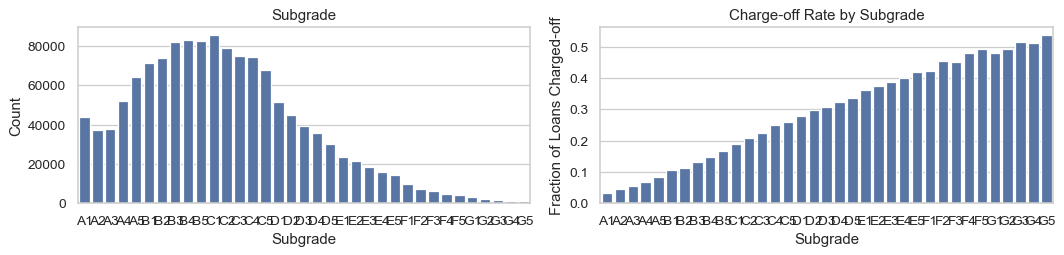

In [48]:
plot_variable('sub_grade', 'Subgrade', False)

Ta thấy rõ ràng xu hướng về khả năng bị thu phí cao hơn khi nền đường xuống cấp.

## 4.7 emp_title

Định nghĩa: " Chức danh công việc do bên vay cung cấp khi đăng ký vay."

In [49]:
data['emp_title'].describe()

count     1259525
unique     378353
top       Teacher
freq        21268
Name: emp_title, dtype: object

Có quá nhiều chức danh công việc khác nhau, không cần thiết nên bỏ nó đi.

In [50]:
data.drop(labels='emp_title', axis=1, inplace=True)

## 4.8 emp_length

Định nghĩa : "Thời gian làm việc tính bằng năm. Các giá trị có thể nằm trong khoảng từ 0 đến 10 trong đó 0 có nghĩa là dưới một năm và 10 có nghĩa là mười năm trở lên." Dữ liệu thực tế không khớp với mô tả này:

In [51]:
data['emp_length'].value_counts(dropna=False).sort_index()

emp_length
1 year        88494
10+ years    442199
2 years      121743
3 years      107597
4 years       80556
5 years       84154
6 years       62733
7 years       59624
8 years       60701
9 years       50937
< 1 year     108061
NaN           78511
Name: count, dtype: int64

Lưu ý có 78511 khoản vay không có dữ liệu về thời gian làm việc.

Chuyển kiểu `emp_length` thành số nguyên:

In [52]:
data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [53]:
data['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [54]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [55]:
data['emp_length'] = data['emp_length'].apply(emp_length_to_int)

In [56]:
data['emp_length'].value_counts(dropna=False).sort_index()

emp_length
0.0     108061
1.0      88494
2.0     121743
3.0     107597
4.0      80556
5.0      84154
6.0      62733
7.0      59624
8.0      60701
9.0      50937
10.0    442199
NaN      78511
Name: count, dtype: int64

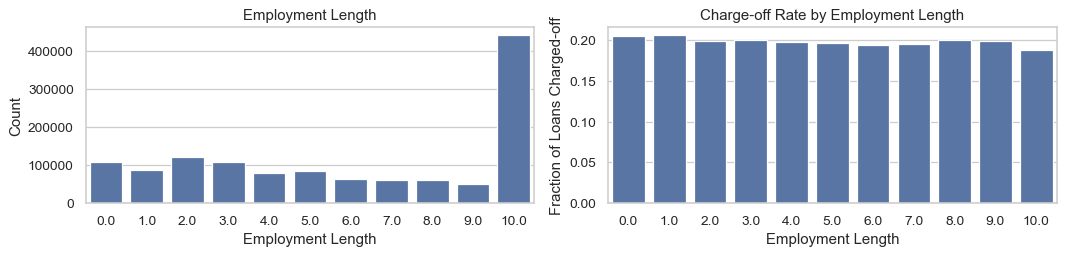

In [57]:
plot_variable('emp_length', 'Employment Length', False)

Tình trạng khoản vay dường như không thay đổi nhiều theo thời gian làm việc trung bình, ngoại trừ một khoản giảm nhẹ đối với những người đi vay có trên 10 năm làm việc.

## 4.9 home_ownership

Định nghĩa: "Tình trạng sở hữu nhà do người vay cung cấp trong quá trình đăng ký hoặc lấy được từ báo cáo tín dụng. Các giá trị của chúng tôi là: THUÊ, SỞ HỮU, THẾ CHẤP, KHÁC (RENT, OWN, MORTGAGE, OTHER)."

In [58]:
data['home_ownership'].value_counts(dropna=False)

home_ownership
MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: count, dtype: int64

Thay thế các giá trị BẤT KỲ và NONE bằng OTHER:

In [59]:
data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [60]:
data['home_ownership'].value_counts(dropna=False)

home_ownership
MORTGAGE    665579
RENT        534421
OWN         144832
OTHER          478
Name: count, dtype: int64

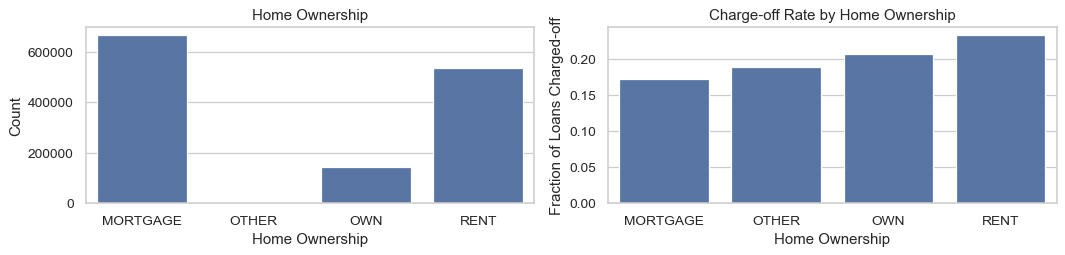

In [61]:
plot_variable('home_ownership', 'Home Ownership', False)

Dường như có sự khác biệt lớn về tỷ lệ tính phí theo tình trạng sở hữu nhà. Người thuê nhà và chủ sở hữu nhà có khả năng bị tính phí cao hơn.

So sánh tỷ lệ tính phí:

In [62]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.172077
OTHER       0.188285
OWN         0.206198
RENT        0.232165
Name: proportion, dtype: float64

## 4.10 annual_inc

Định nghĩa: "Thu nhập hàng năm tự báo cáo do người vay cung cấp trong quá trình đăng ký."

In [63]:
data['annual_inc'].describe()

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

    Thu nhập hàng năm dao động từ $0 đến $10,990,000, với mức trung bình là $65,000. Do có nhiều mức thu nhập khác nhau nên chúng ta nên lấy phép biến đổi logarit của biến thu nhập hàng năm.

In [64]:
data['log_annual_inc'] = data['annual_inc'].apply(lambda x: np.log10(x+1))

In [65]:
data.drop('annual_inc', axis=1, inplace=True)

In [66]:
data['log_annual_inc'].describe()

count    1.345310e+06
mean     4.812814e+00
std      2.477200e-01
min      0.000000e+00
25%      4.660685e+00
50%      4.812920e+00
75%      4.954247e+00
max      7.041361e+00
Name: log_annual_inc, dtype: float64

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\4280792411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)


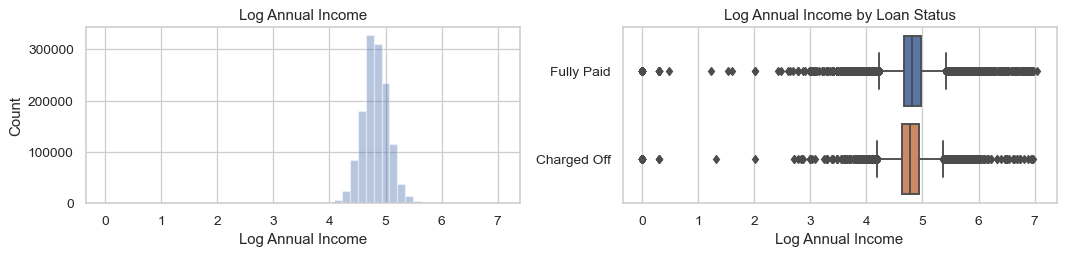

In [67]:
plot_variable('log_annual_inc', 'Log Annual Income', True)

Có vẻ như những cá nhân có thu nhập cao hơn có nhiều khả năng trả hết các khoản vay của họ hơn.

So sánh số liệu thống kê tóm tắt theo tình trạng khoản vay:

In [68]:
data.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,4.781756,0.241984,0.0,4.633479,4.778158,4.929424,6.977724
Fully Paid,1076751.0,4.820560,0.248526,0.0,4.672107,4.812920,4.968488,7.041361


## 4.11 verification_status

Định nghĩa: "Cho biết liệu thu nhập đã được [Lending Club] xác minh chưa, chưa được xác minh hoặc nguồn thu nhập đã được xác minh hay chưa."

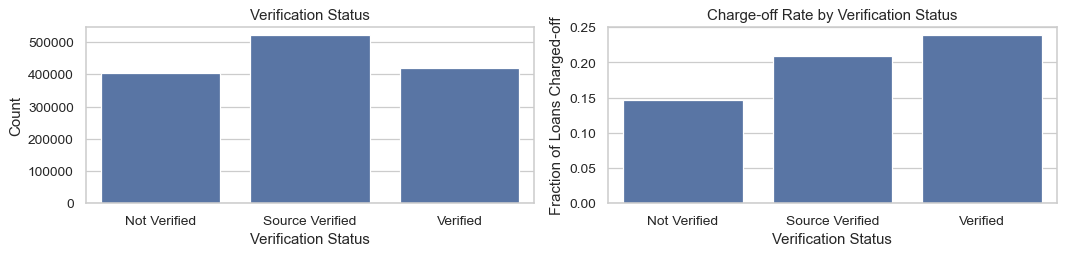

In [69]:
plot_variable('verification_status', 'Verification Status', False)

## 4.12 issue_d

Định nghĩa : Từ điển dữ liệu: “Tháng mà khoản vay được tài trợ.”

Bởi vì chúng tôi chỉ sử dụng các biến có sẵn cho các nhà đầu tư trước khi khoản vay được tài trợ nên issue_d sẽ không được đưa vào mô hình cuối cùng. Hiện tại, chúng tôi đang giữ nó chỉ để thực hiện việc phân chia đào tạo/kiểm tra sau, sau đó sẽ bỏ nó.

## 4.13 purpose

Định nghĩa: "Một danh mục được cung cấp bởi người vay cho yêu cầu vay vốn."

In [70]:
data['purpose'].value_counts()

purpose
debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: count, dtype: int64

Tính tỷ lệ thu phí theo mục đích:

In [71]:
data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.121622
car                   0.146795
credit_card           0.169270
educational           0.171779
home_improvement      0.177158
major_purchase        0.185998
vacation              0.191726
other                 0.210401
debt_consolidation    0.211469
medical               0.217757
house                 0.218806
moving                0.233544
renewable_energy      0.236870
small_business        0.297094
Name: proportion, dtype: float64

Lưu ý rằng chỉ 16% các khoản vay cải thiện nhà, thẻ tín dụng đã hoàn tất đã được hoàn trả, nhưng 29% các khoản vay dành cho doanh nghiệp nhỏ đã hoàn tất đã được hoàn trả.

## 4.14 title

Định nghĩa:  “Tên khoản vay do người đi vay cung cấp.”

In [72]:
data['title'].describe()

count                1328650
unique                 61681
top       Debt consolidation
freq                  660960
Name: title, dtype: object

Xem 10 khoản vay hàng đầu và tần suất của chúng:

In [73]:
data['title'].value_counts().head(10)

title
Debt consolidation         660960
Credit card refinancing    249910
Home improvement            75073
Other                       66778
Major purchase              24045
Debt Consolidation          15695
Medical expenses            13576
Business                    11750
Car financing               11220
Vacation                     8046
Name: count, dtype: int64

Có 12 tên khoản vay khác nhau trong tập dữ liệu, cột mục đích - purpose dường như đã chứa thông tin này. Vì cột này không cần thiết nữa nên ta có thể bỏ nó

In [74]:
data.drop('title', axis=1, inplace=True)

## 4.15 zip_code, addr_state

Định nghĩa cho zip_code: "3 số đầu tiên của mã zip được người vay cung cấp trong đơn xin vay."

Định nghĩa cho addr_state: "Trạng thái được cung cấp bởi người đi vay trong đơn xin vay."

In [75]:
data['zip_code'].sample(15)

420063     959xx
1160799    703xx
139746     334xx
1285120    076xx
1333675    998xx
26886      305xx
1815996    800xx
2102732    291xx
1309484    371xx
278867     623xx
244640     770xx
247344     917xx
90877      350xx
581129     747xx
363610     473xx
Name: zip_code, dtype: object

In [76]:
data['zip_code'].nunique()

943

In [77]:
data['addr_state'].sample(5)

938360     MD
1997864    MD
2040960    CA
2160713    OR
1872801    AZ
Name: addr_state, dtype: object

In [78]:
data['addr_state'].nunique()

51

Có rất nhiều mã zip khác nhau nên chúng ta chỉ giữ lại cột trạng thái - state.

In [79]:
data.drop(labels='zip_code', axis=1, inplace=True)

Tính tỷ lệ tính phí theo trạng thái địa chỉ:

In [80]:
data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
DC    0.132086
ME    0.138424
VT    0.139517
IA    0.142857
OR    0.143850
NH    0.145759
WV    0.155187
CO    0.155269
WA    0.157565
SC    0.162769
KS    0.167438
WY    0.167693
MT    0.168716
UT    0.170586
CT    0.173763
RI    0.178675
IL    0.180974
WI    0.183510
GA    0.183927
ID    0.188277
MA    0.190528
CA    0.196104
AZ    0.196299
AK    0.196552
MN    0.197430
DE    0.197462
TX    0.198223
VA    0.199422
HI    0.202013
MI    0.202957
ND    0.204744
OH    0.205283
NC    0.207839
PA    0.207921
KY    0.209829
NJ    0.211212
MO    0.212935
MD    0.213085
SD    0.213227
NM    0.213665
TN    0.214079
IN    0.214082
FL    0.214746
NV    0.219223
NY    0.220435
LA    0.231821
OK    0.234753
AL    0.236321
AR    0.240868
NE    0.251813
MS    0.260777
Name: proportion, dtype: float64

Tỷ lệ tính phí dao động từ 15,0% ở DC, Washington đến 26,07% ở Mississippi.

## 4.16 dti

Định nghĩa: "Tỷ lệ được tính bằng cách sử dụng tổng số tiền thanh toán nợ hàng tháng của người đi vay trên tổng nghĩa vụ nợ, không bao gồm khoản thế chấp và khoản vay LC được yêu cầu, chia cho thu nhập hàng tháng do người đi vay tự báo cáo."

In [81]:
data['dti'].describe()

count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64

Lưu ý giá trị -1 và 999 có hợp lý hay không...

Có thể tồn tại một số ngoại lệ làm sai lệch dữ liệu của chúng ta.
Vẽ biểu đồ cho dti nhỏ hơn 60

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\104706828.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data['dti'].notnull() & (data['dti']<60), 'dti'], kde=False)


Text(0.5, 1.0, 'Debt-to-income Ratio')

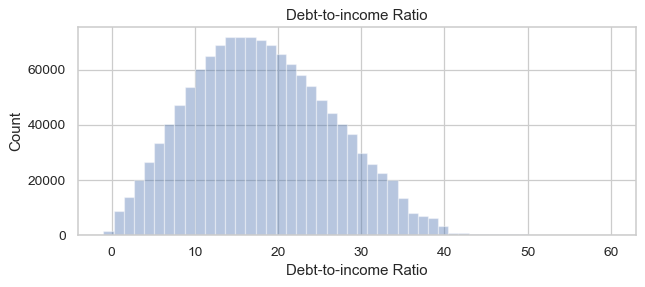

In [82]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(data.loc[data['dti'].notnull() & (data['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

Có bao nhiêu giá trị dti là "ngoại lệ" (trên 60)?

In [83]:
(data['dti']>=60).sum()

1715

Có bao nhiêu giá trị dti là "ngoại lệ" (trên 60)?

In [84]:
data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268488.0,20.171196,11.831747,0.0,13.55,19.76,26.31,999.0
Fully Paid,1076448.0,17.811629,10.935927,-1.0,11.43,17.11,23.44,999.0


Các khoản vay đã hoàn thành được tính phí có xu hướng có tỷ lệ nợ trên thu nhập cao hơn.

## 4.17 earliest_cr_line

Định nghĩa: "Tháng mở hạn mức tín dụng được báo cáo sớm nhất của người đi vay.."

In [85]:
data['earliest_cr_line'].sample(5)

1137791    Jul-2010
1747362    Jan-1989
1831747    Sep-1983
1189043    Oct-1999
267557     Nov-2002
Name: earliest_cr_line, dtype: object

In [86]:
data['earliest_cr_line'].isnull().any()

False

Giữ lại năm để đơn giản cho việc phân tích:

In [87]:
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [88]:
data['earliest_cr_line'].describe()

count    1.345310e+06
mean     1.998693e+03
std      7.608258e+00
min      1.934000e+03
25%      1.995000e+03
50%      2.000000e+03
75%      2.004000e+03
max      2.015000e+03
Name: earliest_cr_line, dtype: float64

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\4280792411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)


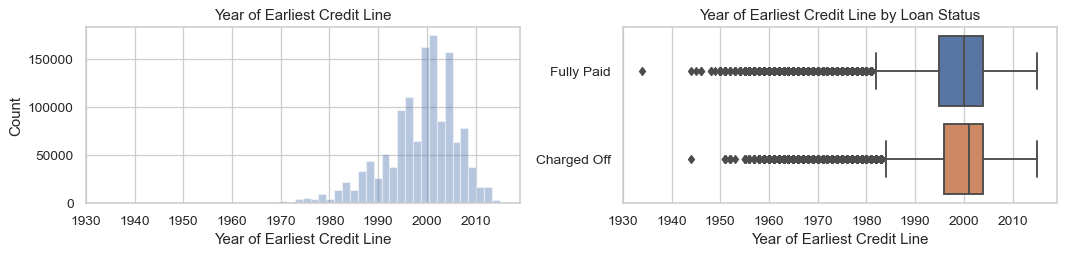

In [89]:
plot_variable('earliest_cr_line', 'Year of Earliest Credit Line', True)

Những người đi vay bị tính phí có xu hướng có hạn mức tín dụng ngắn hơn

## 4.18 fico_range_low, fico_range_high

Định nghĩa cho fico_range_low: "Phạm vi ranh giới dưới mà FICO của người vay khi bắt đầu khoản vay thuộc về."

Định nghĩa cho fico_range_high: "Phạm vi ranh giới trên mà FICO của người vay khi bắt đầu khoản vay thuộc về."

In [90]:
data[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,1.345310e+06,1.345310e+06
mean,6.961850e+02,7.001852e+02
std,3.185251e+01,3.185316e+01
min,6.250000e+02,6.290000e+02
25%,6.700000e+02,6.740000e+02
50%,6.900000e+02,6.940000e+02
75%,7.100000e+02,7.140000e+02
max,8.450000e+02,8.500000e+02


Kiểm tra mối tương quan giữa Pearson với các giá trị này:

In [91]:
data[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


Chúng ta chỉ cần giữ một trong các điểm FICO. Chúng ta sẽ lấy giá trị trung bình của cả hai và gọi nó là fico_score:

In [92]:
data['fico_score'] = 0.5*data['fico_range_low'] + 0.5*data['fico_range_high']

In [93]:
data.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\4280792411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)


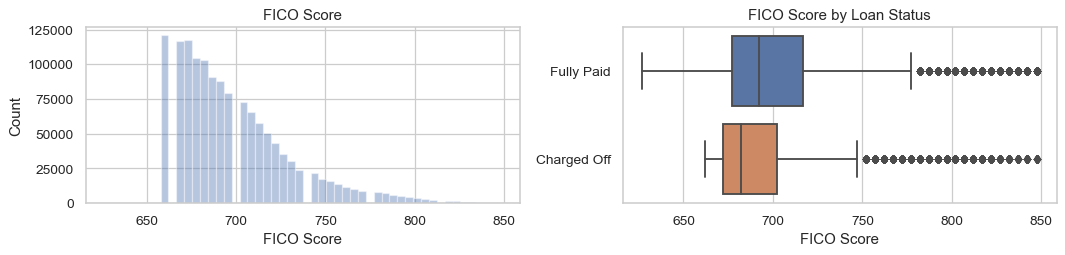

In [94]:
plot_variable('fico_score', 'FICO Score', True)

Có sự khác biệt đáng chú ý về điểm FICO giữa các khoản vay được thanh toán đầy đủ và các khoản vay được tính phí.

So sánh số liệu thống kê tóm tắt

In [95]:
data.groupby('loan_status')['fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,689.850145,25.948737,662.0,672.0,682.0,702.0,847.5
Fully Paid,1076751.0,700.263982,32.834008,627.0,677.0,692.0,717.0,847.5


Các khoản vay được tính phí có điểm FICO trung bình thấp hơn 10 điểm.

## 4.19 open_acc

Định nghĩa: "Số lượng hạn mức tín dụng mở trong hồ sơ tín dụng của người đi vay."

Text(0.5, 1.0, 'Number of Open Credit Lines')

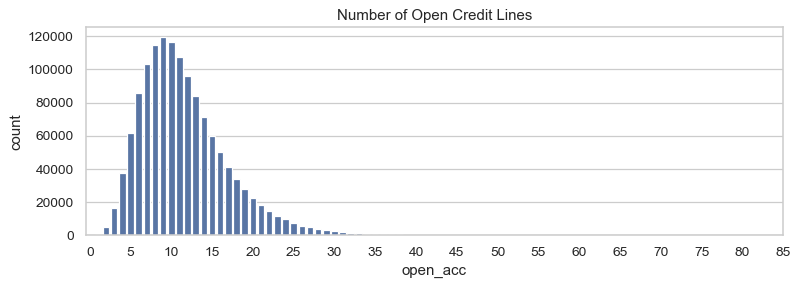

In [96]:
plt.figure(figsize=(10,3), dpi=90)

sns.countplot(x=data['open_acc'], data=data, order=sorted(data['open_acc'].dropna().unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

Có sự khác biệt về số lượng hạn mức tín dụng giữa các khoản vay được thanh toán đầy đủ và các khoản vay được tính phí không?

In [97]:
data.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,11.901269,5.637964,0.0,8.0,11.0,15.0,76.0
Fully Paid,1076751.0,11.516763,5.429354,0.0,8.0,11.0,14.0,90.0


## 4.20 pub_rec

Định nghĩa: "Số hồ sơ công khai xúc phạm."

In [98]:
data['pub_rec'].value_counts().sort_index()

pub_rec
0.0     1117425
1.0      190789
2.0       24435
3.0        7399
4.0        2630
5.0        1266
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
14.0          5
15.0          9
16.0          5
17.0          3
18.0          6
19.0          5
20.0          3
21.0          6
22.0          2
23.0          1
24.0          2
25.0          1
28.0          3
34.0          1
37.0          1
40.0          1
46.0          1
47.0          1
49.0          2
54.0          1
61.0          1
63.0          1
86.0          1
Name: count, dtype: int64

Có sự khác biệt nào trong trung bình hồ sơ công khai giữa các khoản vay được thanh toán đầy đủ và các khoản vay được tính phí không?

In [99]:
data.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,0.246843,0.656732,0.0,0.0,0.0,0.0,86.0
Fully Paid,1076751.0,0.207403,0.587118,0.0,0.0,0.0,0.0,63.0


## 4.21 revol_bal

Định nghĩa: "Tổng số dư tín dụng quay vòng."

In [100]:
data['revol_bal'].describe()

count    1.345310e+06
mean     1.624811e+04
std      2.232817e+04
min      0.000000e+00
25%      5.943000e+03
50%      1.113400e+04
75%      1.975575e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

Thực hiện chuyển đổi log:

In [101]:
data['log_revol_bal'] = data['revol_bal'].apply(lambda x: np.log10(x+1))

In [102]:
data.drop('revol_bal', axis=1, inplace=True)

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\4280792411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)


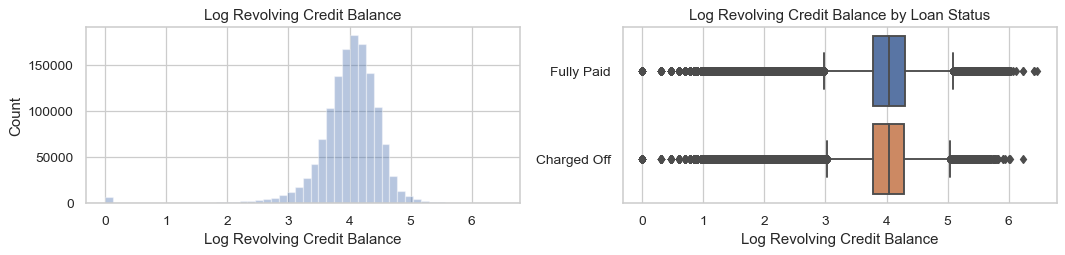

In [103]:
plot_variable('log_revol_bal', 'Log Revolving Credit Balance',True)

In [104]:
data.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,3.985882,0.515100,0.0,3.777499,4.044265,4.281079,6.242223
Fully Paid,1076751.0,3.993775,0.536333,0.0,3.773201,4.047314,4.299420,6.463122


Không có sự khác biệt đáng kể.

## 4.22 revol_util

Định nghĩa: "Tỷ lệ sử dụng dòng quay vòng hoặc số tiền tín dụng mà người đi vay đang sử dụng so với tất cả tín dụng quay vòng có sẵn."

In [105]:
data['revol_util'].describe()

count    1.344453e+06
mean     5.181002e+01
std      2.452107e+01
min      0.000000e+00
25%      3.340000e+01
50%      5.220000e+01
75%      7.070000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\4280792411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)


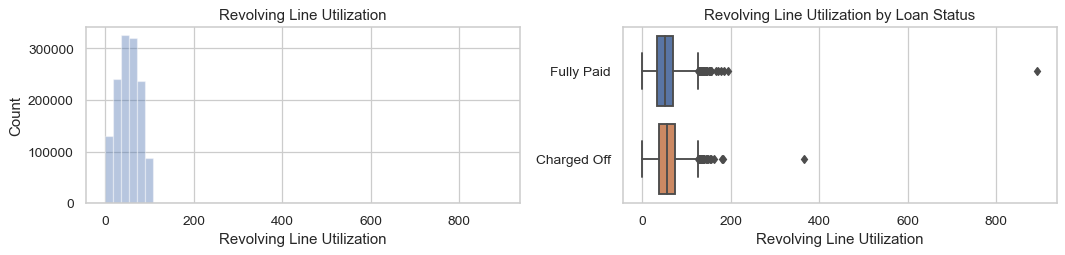

In [106]:
plot_variable('revol_util', 'Revolving Line Utilization', True)

In [107]:
data.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268379.0,54.758433,23.865982,0.0,37.4,55.5,73.1,366.6
Fully Paid,1076074.0,51.074671,24.626821,0.0,32.5,51.3,70.1,892.3


## 4.23 total_acc

Định nghĩa: "Tổng số hạn mức tín dụng hiện có trong hồ sơ tín dụng của người đi vay."

Text(0.5, 1.0, 'Total Number of Credit Lines')

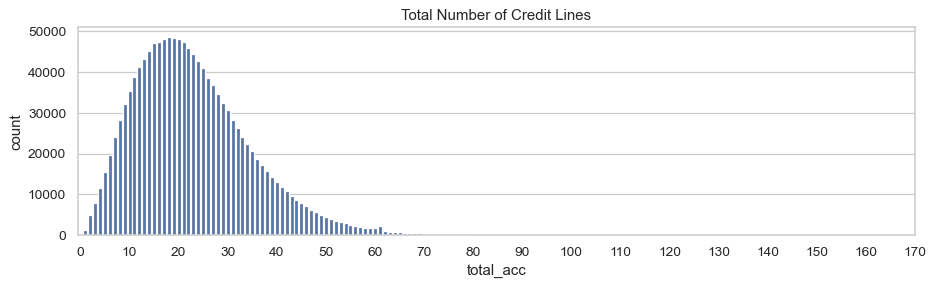

In [108]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(x=data['total_acc'],data=data, order=sorted(data['total_acc'].dropna().unique()), color='#5975A4', saturation=1)

_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [109]:
data.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,24.709356,12.117364,2.0,16.0,23.0,31.0,176.0
Fully Paid,1076751.0,25.048551,11.967683,2.0,16.0,23.0,32.0,162.0


Không có sự khác biệt lớn ở đây.

## 4.24 initial_list_status

Định nghĩa: "Trạng thái niêm yết ban đầu của khoản vay. Các giá trị có thể là – W, ​​F."

Tôi không chắc điều này có nghĩa là gì

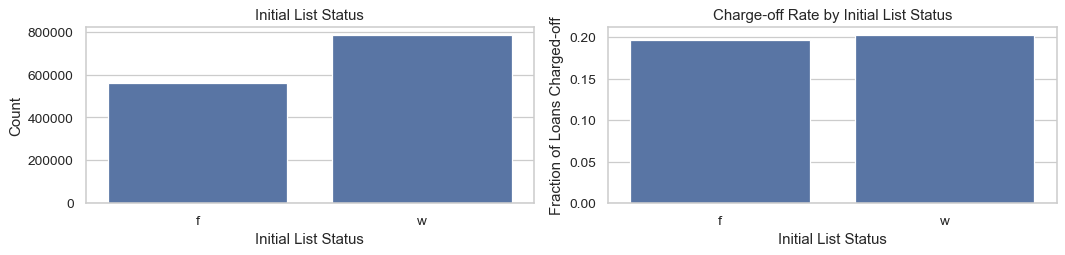

In [110]:
plot_variable('initial_list_status', 'Initial List Status', False)

## 4.25 application_type

Định nghĩa: "Cho biết khoản vay là đơn đăng ký riêng lẻ hay đơn đăng ký chung với hai người đồng vay."

In [111]:
data['application_type'].value_counts()

application_type
Individual    1319510
Joint App       25800
Name: count, dtype: int64

Chúng ta hãy so sánh tỷ lệ charge-off theo loại đơn đăng kí:

In [112]:
data.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.198721
Joint App     0.245891
Name: proportion, dtype: float64

Các khoản vay chung ít có khả năng bị charge-off hơn.

## 4.26 mort_acc

Định nghĩa: "Số lượng tài khoản thế chấp."

In [113]:
data['mort_acc'].describe()

count    1.298029e+06
mean     1.670783e+00
std      2.000444e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

Không chắc làm thế nào một người nào đó có thể có 51 tài khoản thế chấp...nhưng rõ ràng là có xuất hiện. Kiểm tra 10 giá trị đầu:

In [114]:
data['mort_acc'].value_counts().head(10)

mort_acc
0.0    523837
1.0    226135
2.0    188941
3.0    139381
4.0     94920
5.0     57632
6.0     32539
7.0     16850
8.0      8378
9.0      4285
Name: count, dtype: int64

So sánh số liệu thống kê tóm tắt theo tình trạng khoản vay:

In [115]:
data.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261673.0,1.371032,1.825505,0.0,0.0,1.0,2.0,29.0
Fully Paid,1036356.0,1.746468,2.035279,0.0,0.0,1.0,3.0,51.0


Những cá nhân trả hết khoản vay của họ có nhiều khả năng có nhiều tài khoản thế chấp hơn.

## 4.27 pub_rec_bankruptcies

Định nghĩa: "Số hồ sơ công khai phá sản.""

In [116]:
data['pub_rec_bankruptcies'].value_counts().sort_index()

pub_rec_bankruptcies
0.0     1176953
1.0      157696
2.0        7769
3.0        1583
4.0         396
5.0         141
6.0          46
7.0          15
8.0           9
9.0           3
11.0          1
12.0          1
Name: count, dtype: int64

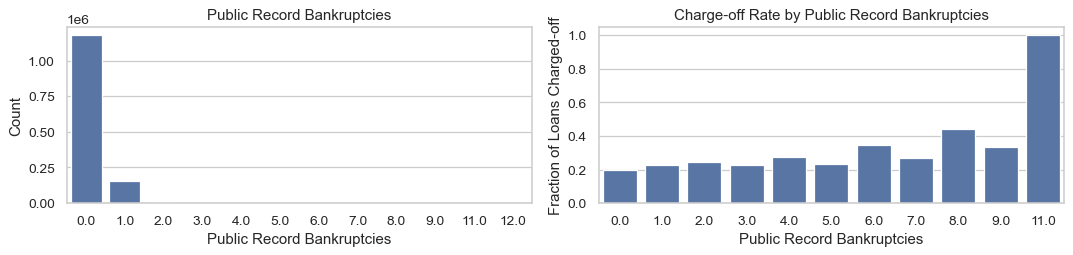

In [117]:
plot_variable('pub_rec_bankruptcies', 'Public Record Bankruptcies', False)

# 5. More Pre-processing
<a id="5"></a>

## 5.1 Chuyển đổi trạng thái khoản vay thành số (0/1)
<a id="5.1"></a>

Thay đổi biến phản hồi cho loan_status thành biến 0/1, trong đó 0 biểu thị Fully Paid và 1 biểu thị Charged Off.

In [118]:
data['charged_off'] = (data['loan_status'] == 'Charged Off').apply(np.uint8)
data.drop('loan_status', axis=1, inplace=True)

## 5.2 Create dummy variables - tạo biến thay thế (giả)
<a id="652"></a>

Hiện tại chúng ta có bao nhiêu biến?

In [119]:
data.shape

(1345310, 25)

Nếu bất kỳ biến phân loại nào bị thiếu giá trị, chúng ta sẽ cần tạo các biến giả NaN cho những biến đó. Vì vậy, trước tiên hãy kiểm tra xem biến nào bị thiếu dữ liệu:

In [120]:
missing_fractions = data.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable

In [121]:
print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data

emp_length              0.058359
mort_acc                0.035145
revol_util              0.000637
pub_rec_bankruptcies    0.000518
dti                     0.000278
dtype: float64


Không có biến phân loại nào bị thiếu giá trị và do đó chúng tôi không cần bất kỳ biến giả NaN nào.

Tạo các biến giả cho các biến phân loại:

In [122]:
print(data.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'log_annual_inc', 'fico_score', 'log_revol_bal', 'charged_off'],
      dtype='object')


In [123]:
data = pd.get_dummies(data, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type'], drop_first=True)

Hiện tại chúng ta có bao nhiêu biến?

In [124]:
data.shape

(1345310, 122)

Kiểm tra dữ liệu của chúng tôi với các biến giả mới:

In [125]:
data.sample(5)

,loan_amnt,term,int_rate,installment,emp_length,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
1085258,32050.0,36,14.85,1108.68,2.0,Feb-2016,26.28,2004,18.0,0.0,69.0,27.0,0.0,0.0,4.852632,692.0,4.406574,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
130228,28000.0,60,13.99,651.37,10.0,Sep-2015,16.37,1984,10.0,0.0,54.3,23.0,6.0,0.0,4.763435,677.0,4.328176,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
348941,20000.0,36,6.68,614.62,2.0,Mar-2015,26.66,1995,14.0,0.0,66.1,25.0,3.0,0.0,4.845104,687.0,4.588944,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
133395,12000.0,36,8.18,377.04,10.0,Sep-2015,19.5

## 5.3 Train/test split
<a id="5.3"></a>

Làm cho vấn đề lập mô hình của mình trở nên thực tế hơn bằng cách thực hiện phân chia đào tạo/kiểm tra dựa trên tháng mà khoản vay được tài trợ. Nghĩa là, chúng ta sẽ sử dụng các khoản vay được tài trợ vào những ngày trước đó để dự đoán liệu các khoản vay trong tương lai có được thanh toán hay không. Biến `issue_d` bao gồm tháng và năm khoản vay được tài trợ.

In [126]:
data['issue_d'].sample(5)

1952048    Sep-2016
1898515    Oct-2012
302728     Apr-2015
1730697    Jan-2017
118717     Oct-2015
Name: issue_d, dtype: object

Are there any missing values?

In [127]:
data['issue_d'].isnull().any()

False

Chuyển đổi ngày phát hành thành đối tượng datetime:

In [128]:
data['issue_d'] = pd.to_datetime(data['issue_d'])

C:\Users\hoang\AppData\Local\Temp\ipykernel_22372\2469893809.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])


In [129]:
data['issue_d'].sample(5)

391584    2015-01-01
1350570   2014-01-01
991337    2016-03-01
724099    2016-04-01
1302141   2014-04-01
Name: issue_d, dtype: datetime64[ns]

Tất cả các giá trị ngày giờ mới đều vào ngày đầu tiên của tháng. Kiểm tra số liệu thống kê tóm tắt về ngày phát hành:

In [130]:
data['issue_d'].describe()

count                          1345310
mean     2015-06-06 17:48:20.835048960
min                2007-06-01 00:00:00
25%                2014-07-01 00:00:00
50%                2015-08-01 00:00:00
75%                2016-07-01 00:00:00
max                2018-12-01 00:00:00
Name: issue_d, dtype: object

Chỉ có 124 ngày phát hành duy nhất trong khoảng thời gian 10 năm vì chúng tôi chỉ có thông tin tháng/năm. Trong tập dữ liệu cụ thể này, các khoản vay đầu tiên được phát hành vào tháng 6 năm 2007 và các khoản vay gần đây nhất được phát hành vào tháng 9 năm 2017. Tháng bận rộn nhất là tháng 10 năm 2014 với 33.699 khoản vay được tài trợ trong tháng đó. Việc phân bổ các khoản vay được tài trợ trong mỗi năm như thế nào?

Text(0.5, 1.0, 'Loans Funded per Year')

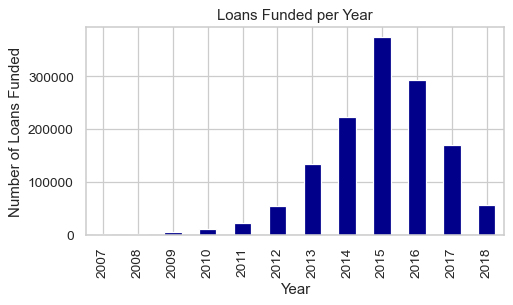

In [131]:
plt.figure(figsize=(6,3), dpi=90)
data['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

Chúng tôi sẽ hình thành bộ kiểm tra từ 10% khoản vay gần đây nhất.

In [132]:
loans_train = data.loc[data['issue_d'] <  data['issue_d'].quantile(0.9)]
loans_test =  data.loc[data['issue_d'] >= data['issue_d'].quantile(0.9)]

Kiểm tra xem chúng tôi đã phân chia các khoản vay một cách hợp lý chưa:

In [133]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', data.shape[0])

Number of loans in the partition:    1345310
Number of loans in the full dataset: 1345310


Kích thước thử nghiệm là gì?

In [134]:
loans_test.shape[0] / data.shape[0]

0.11111639696426846

Khoảng 10,2%. Phân vùng có vẻ ổn, vì vậy chúng ta có thể xóa khung dữ liệu `data` ban đầu:

In [135]:
del data

Hãy xem số liệu thống kê tóm tắt về ngày phát hành trong tập huấn luyện và tập kiểm tra:

In [136]:
loans_train['issue_d'].describe()

count                          1195824
mean     2015-02-14 03:13:47.495684864
min                2007-06-01 00:00:00
25%                2014-05-01 00:00:00
50%                2015-06-01 00:00:00
75%                2016-03-01 00:00:00
max                2017-05-01 00:00:00
Name: issue_d, dtype: object

In [137]:
loans_test['issue_d'].describe()

count                           149486
mean     2017-11-23 13:15:22.119796992
min                2017-06-01 00:00:00
25%                2017-08-01 00:00:00
50%                2017-11-01 00:00:00
75%                2018-03-01 00:00:00
max                2018-12-01 00:00:00
Name: issue_d, dtype: object

The training set includes loans from June 2007 to June 2016. The test set includes loans from July 2016 to September 2017.

Now we need to delete the `issue_d` variable, because it was not available before the loan was funded.

In [138]:
loans_train.drop('issue_d', axis=1, inplace=True)
loans_test.drop('issue_d', axis=1, inplace=True)

Now separate the predictor variables from the response variable:

In [139]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [140]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [141]:
del loans_train, loans_test

## 8.1 Logistic regression with SGD training
<a id="8.1"></a>

The `SGDClassifier` estimator in scikit-learn implements linear classifiers (SVM, logistic regression, and others) with stochastic gradient descent (SGD) training. A particular linear classifier is chosen through the `loss` hyperparameter. Because we want to predict the probability of charge-off, we choose logistic regression (a probabilistic classifier) by setting `loss = 'log'`.

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

The machine learning pipeline:

In [143]:
pipeline_logreg = Pipeline([
    ('imputer', SimpleImputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', LogisticRegression(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

A small grid of hyperparameters to search over:

In [144]:
param_grid_logreg = {
    'model__penalty': ['l1', 'l2']
}

Create the search grid object:

In [145]:
grid_logreg = GridSearchCV(estimator=pipeline_logreg, param_grid=param_grid_logreg, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

Conduct the grid search and train the final model on the whole dataset:

In [146]:
grid_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\ancoda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ancoda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ancoda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ancoda\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ancoda\Lib\site-pac

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer(copy=False)),
                                       ('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=1,
                                                           tol=0.001,
                                                           warm_start=True))]),
             n_jobs=1, param_grid={'model__penalty': ['l1', 'l2']},
             pre_dispatch=1, scoring='roc_auc', verbose=1)

Mean cross-validated AUROC score of the best model:

In [147]:
grid_logreg.best_score_

0.7124531934781234

Best hyperparameters:

In [148]:
grid_logreg.best_params_

{'model__penalty': 'l2'}

## 8.2 Random forest classifier
<a id="8.2"></a>

Next we train a random forest model. Note that data standardization is not necessary for a random forest.

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
pipeline_rfc = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

The random forest takes very long to train, so we don't test different hyperparameter choices. We'll still use `GridSearchCV` for the sake of consistency.

In [151]:
param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

The AUROC will always improve (with decreasing gains) as the number of estimators increases, but it's not necessarily worth the extra training time and model complexity.

In [152]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [153]:
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer(copy=False)),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=1, param_grid={'model__n_estimators': [50]}, pre_dispatch=1,
             scoring='roc_auc', verbose=1)

Mean cross-validated AUROC score of the random forest:

In [154]:
grid_rfc.best_score_

0.6943352951183979

Not quite as good as logistic regression, at least according to this metric.

## 8.3 k-nearest neighbors
<a id="8.3"></a>

Next we try k-nearest neighbors. We need to reduce the number of variables to 10 or fewer ([reference](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#Dimension_reduction)) for kNN to perform well. We'll use LDA for dimension reduction. The number of component variables to keep is a hyperparameter.

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [156]:
pipeline_knn = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))
])

In [157]:
param_grid_knn = {
    'lda__n_components': [1, 2, 3], # The number of LDA components to keep
    'model__n_neighbors': [5, 25, 125] # The 'k' in k-nearest neighbors
}

In [158]:
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [159]:
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\ancoda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ancoda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ancoda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ancoda\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer(copy=False)),
                                       ('scaler', StandardScaler(copy=False)),
                                       ('lda', LinearDiscriminantAnalysis()),
                                       ('model',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=1,
             param_grid={'lda__n_components': [1, 2, 3],
                         'model__n_neighbors': [5, 25, 125]},
             pre_dispatch=1, scoring='roc_auc', verbose=1)

Mean cross-validated AUROC score of the best model:

In [160]:
grid_knn.best_score_

0.7029806543196433

Best hyperparameters:

In [161]:
grid_knn.best_params_

{'lda__n_components': 1, 'model__n_neighbors': 125}

Only 1 LDA components are necessary for kNN to perform almost as well as logistic regression!

## 8.4 Comparing the chosen model
<a id="8.4"></a>

The three models performed quite similarly according to the AUROC:

In [162]:
print('Cross-validated AUROC scores')
print(grid_logreg.best_score_, '- Logistic regression')
print(grid_rfc.best_score_, '- Random forest')
print(grid_knn.best_score_, '- k-nearest neighbors')

Cross-validated AUROC scores
0.7124531934781234 - Logistic regression
0.6943352951183979 - Random forest
0.7029806543196433 - k-nearest neighbors


Logistic regression squeaked out ahead, and coupled with the fact that `SGDClassifier` trains much faster than the other two models, we'll select logistic regression as our final model. Now we'll tune the hyperparameters more finely.

## 8.5 Test set evaluation
<a id="8.5"></a>

Now we can finally see how our chosen model performs on the test data (the most recent 10% of the loans).

In [163]:
from sklearn.metrics import roc_auc_score

In [164]:
y_score = grid_logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

0.7053093389916258

### Confusion Matrix

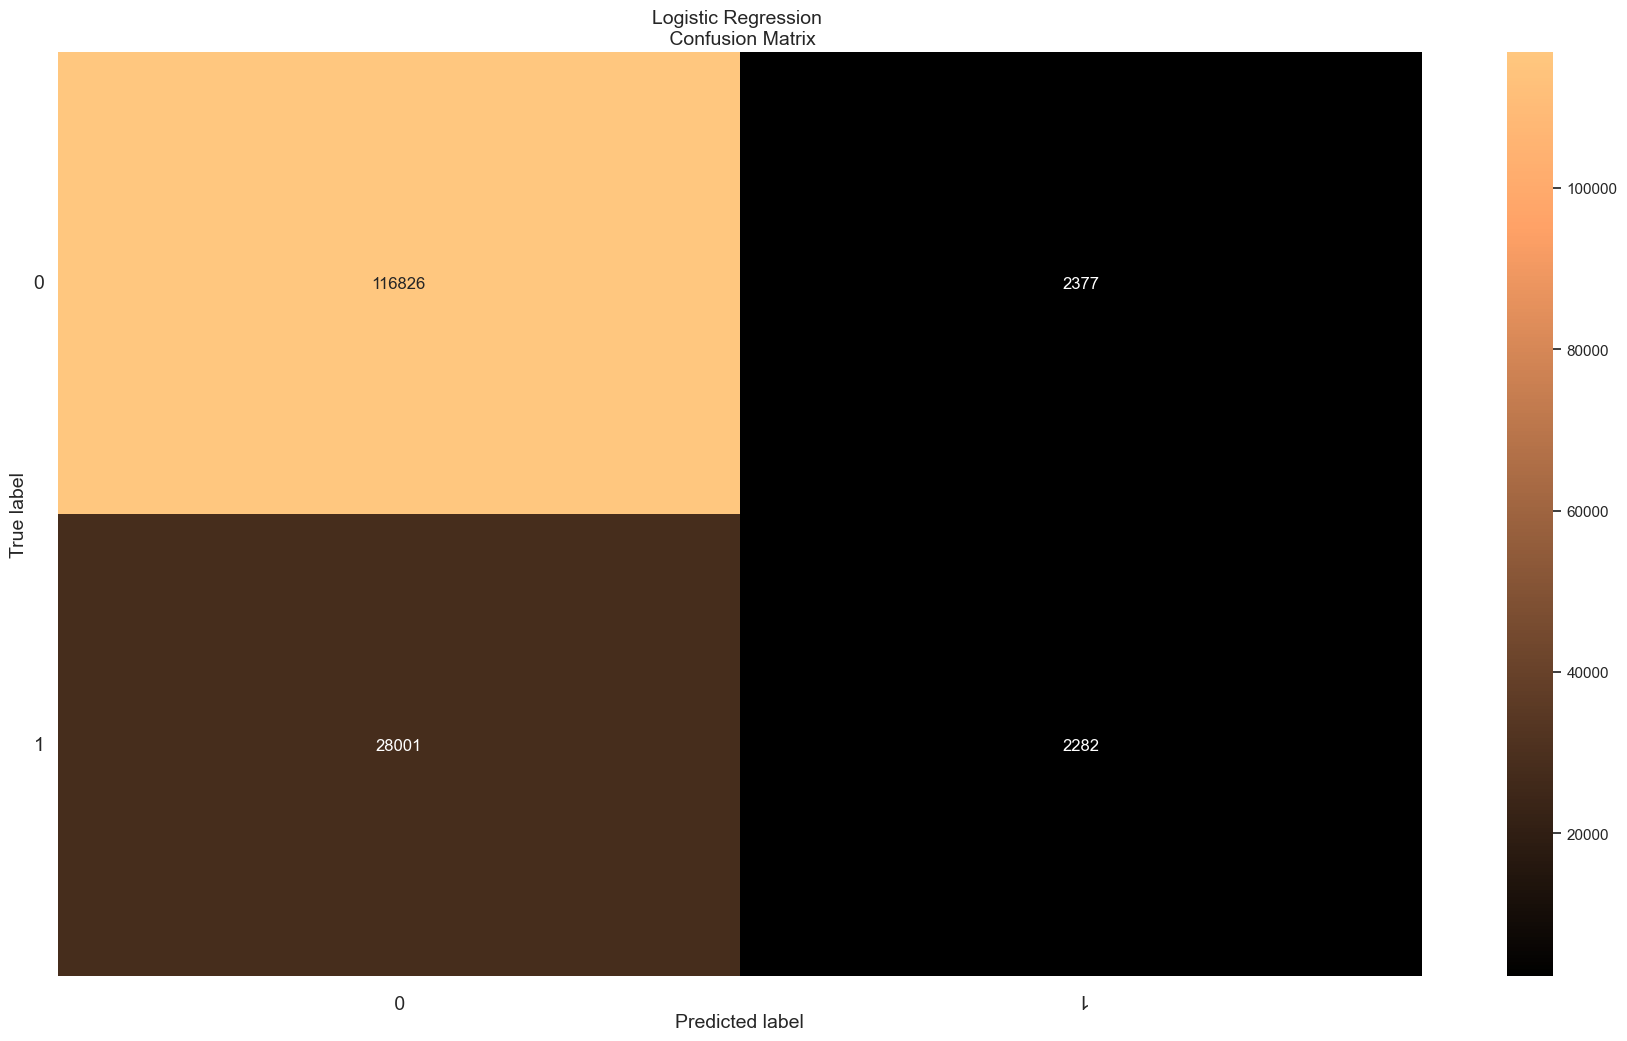

In [165]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_logreg = grid_logreg.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_logreg)

# Draw confusion matrix
fig, ax = plt.subplots(1, 1,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax, annot=True, cmap=plt.cm.copper, fmt='g')
ax.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['0', '1'], fontsize=14, rotation=180)
ax.set_yticklabels(['0', '1'], fontsize=14, rotation=0)
ax.set_ylabel('True label', fontsize=14)
ax.set_xlabel('Predicted label', fontsize=14)


plt.show()

In [166]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88    119203
           1       0.49      0.08      0.13     30283

    accuracy                           0.80    149486
   macro avg       0.65      0.53      0.51    149486
weighted avg       0.74      0.80      0.73    149486



# 9. Conclusion
<a id="9"></a>

We applied machine learning methods to predict the probability that a requested loan on LendingClub will charge off. After training and evaluating three different models (logistic regression, random forest, and k-nearest neighbors), we found that all three performed similarly according to a cross-validated AUROC score on the training data. We selected logistic regression (with ridge penalty) because it was the fastest model to train, and this model obtained an AUROC score of 0.689 on a test set consisting of the most recent 10% of the loans.

This model, while far from perfect, can provide a somewhat informed prediction of the likelihood that a loan will charge off, using only data available to potential investors before the loan is fully funded.

We also found that, according to linear measures of correlation between the predictors and the response, the most important variables for predicting charge-off are the loan interest rate and term, and the borrower's FICO score and debt-to-income ratio.